# External Lab

Importing Libraries  

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Loading  airq402.dat to dataframe

In [74]:
df = pd.read_table("airq402.dat", sep="\s+", header=None,names=['City1','City2','Average_Fare','Distance','Average_weekly_passengers','market_leading_airline','market_share','Average_fare','Low_price_airline','market_share1','price'])

droping non integer columns from data frame

In [75]:
df.drop(['City1', 'City2','market_leading_airline','Low_price_airline'], axis=1,inplace=True)
df

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
5,135.17,1204,199.02,40.68,137.97,17.09,127.69
6,152.85,2237,237.17,59.94,148.59,59.94,148.59
7,190.73,2467,191.95,17.89,205.06,16.59,174.00
8,129.35,1073,550.54,76.84,127.69,76.84,127.69
9,134.17,1130,202.93,35.40,132.91,26.40,124.78


Removing the outliers from the data

In [76]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[(df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR))]
df.dropna(axis=0,inplace=True)

In [77]:
df

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
5,135.17,1204,199.02,40.68,137.97,17.09,127.69
6,152.85,2237,237.17,59.94,148.59,59.94,148.59
7,190.73,2467,191.95,17.89,205.06,16.59,174.00
8,129.35,1073,550.54,76.84,127.69,76.84,127.69
9,134.17,1130,202.93,35.40,132.91,26.40,124.78


Ploting correlation matrix

In [78]:
df.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share1,price
Average_Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average_weekly_passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market_share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average_fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market_share1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


Droping columns having less corelation value(less than 0.1) with Average_Fare

In [79]:
df.drop(['Average_weekly_passengers', 'market_share','market_share1'], axis=1,inplace=True)


In [80]:
df.corr()

,Average_Fare,Distance,Average_fare,price
Average_Fare,1.000000,0.522650,0.979713,0.840993
Distance,0.522650,1.000000,0.489721,0.539894
Average_fare,0.979713,0.489721,1.000000,0.794157
price,0.840993,0.539894,0.794157,1.000000


Ploting Scatter plot with dependant and independent variables  

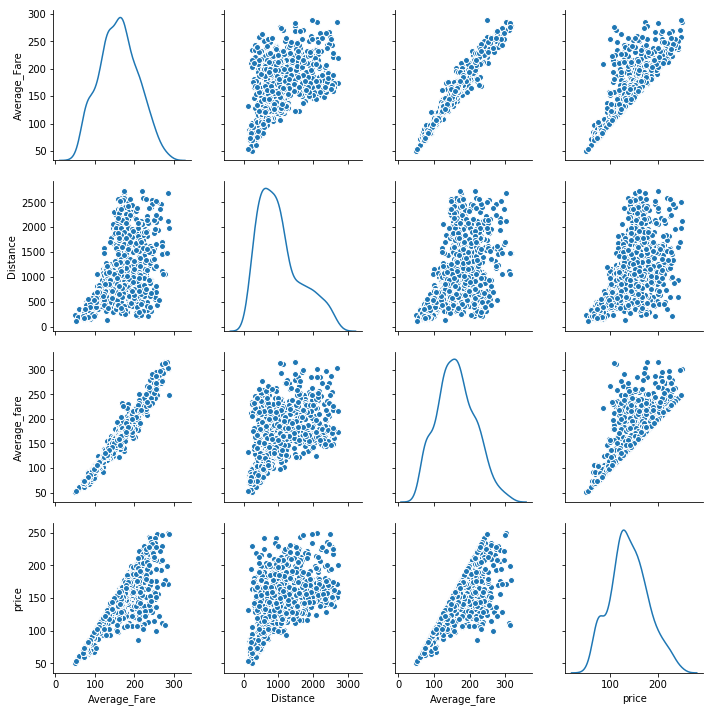

In [81]:
s.pairplot(df,diag_kind='kde')

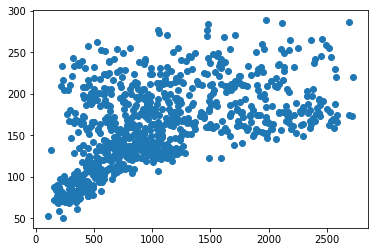

In [82]:
plt.scatter(df['Distance'],df['Average_Fare'])
plt.show()

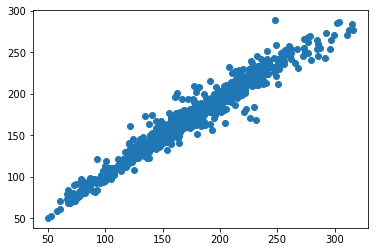

In [83]:
plt.scatter(df['Average_fare'],df['Average_Fare'])
plt.show()

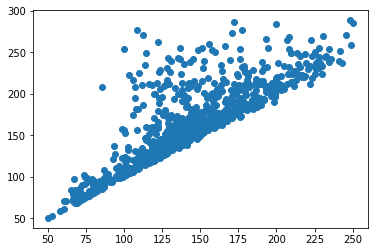

In [84]:
plt.scatter(df['price'],df['Average_Fare'])
plt.show()

Splitting dependant and independent variables (X - Dependant Variable)(Y - Independent Variables)

In [85]:
X = df[["Distance","Average_fare","price"]]
Y = df[["Average_Fare"]]

Splitting Data into train and test dataset

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=3)

Creating Model

In [87]:
model = LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9669260152707712


printing coefficients and intercepts 

In [88]:
print('Printing coefficients')
print(model.coef_)
print('Printing intercepts')
print(model.intercept_ )

Printing coefficients
[[0.00138775 0.7733603  0.19171656]]
Printing intercepts
[6.0159854]


# Checking model using numpy

In [89]:
ons = np.ones((x_train.shape[0],1))
nx_train = np.hstack((ons,x_train))
ons = np.ones((x_test.shape[0],1))
nx_test = np.hstack((ons,x_test))
a = nx_train.T.dot(nx_train)
b = nx_train.T.dot(y_train)
a_inv = np.linalg.inv(a)
slopmat = a_inv.dot(b)
slopmat

array([[6.01598540e+00],
       [1.38775083e-03],
       [7.73360305e-01],
       [1.91716560e-01]])

In [90]:
yhat = nx_test.dot(slopmat)
yhat

array([[169.53414705],
       [176.17612434],
       [156.30474171],
       [146.22961302],
       [202.42584792],
       [172.6523868 ],
       [161.54461925],
       [ 97.41206598],
       [160.73456401],
       [137.20854829],
       [271.43772996],
       [171.23750614],
       [209.91778771],
       [186.24799665],
       [150.73339386],
       [240.65424108],
       [189.68377214],
       [ 79.62724234],
       [184.5587106 ],
       [213.99260639],
       [143.92447721],
       [267.8415811 ],
       [144.44499444],
       [160.53956885],
       [259.45736686],
       [249.46547535],
       [179.38154862],
       [266.65126775],
       [242.6853484 ],
       [168.38075237],
       [127.51719779],
       [167.0810909 ],
       [268.97856604],
       [228.4112555 ],
       [ 97.73675059],
       [163.57393464],
       [147.06479772],
       [124.21265851],
       [188.83603638],
       [166.96393617],
       [281.61579047],
       [182.22703755],
       [ 81.30827982],
       [216

In [91]:
y_mean = y_test - y_test.mean()
y_h = y_test - yhat
y_h = y_h.values.flatten()
y_mean = y_mean.values.flatten()
r2 = 1 - ((y_h.dot(y_h))/(y_mean.dot(y_mean)))
print("R2 error :- ",r2)

R2 error :-  0.9669260152707704
